In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pretrained segmentation model
model = YOLO('yolov8l-seg.pt')

# Predict on an image
results = model('bus.jpg')

# Visualize segmentation with built-in method
results[0].plot()  # plot the first result

# Using matplotlib to visualize all masks
if results[0].masks is not None:
    num_masks = len(results[0].masks.data)
    fig, axs = plt.subplots(1, num_masks, figsize=(15, 5))
    
    if num_masks == 1:
        axs = [axs]  # If there is only one mask, put it in a list for uniform handling
    
    # Get class IDs and convert to class names
    class_ids = results[0].boxes.cls.cpu().numpy()  # Get class IDs
    class_names = [model.names[int(cls_id)] for cls_id in class_ids]  # Convert class IDs to class names

    # Iterate through masks and plot them
    for i, mask in enumerate(results[0].masks.data):
        axs[i].imshow(mask.cpu().numpy(), cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'{class_names[i]}')  # Set the title as the class name

    plt.tight_layout()
    plt.show()
else:
    print("No masks found in the result.")


image 1/1 c:\Users\wjstk\InstSeg-SAM2\test\bus.jpg: 640x480 4 persons, 1 bus, 810.3ms
Speed: 0.0ms preprocess, 810.3ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 480)


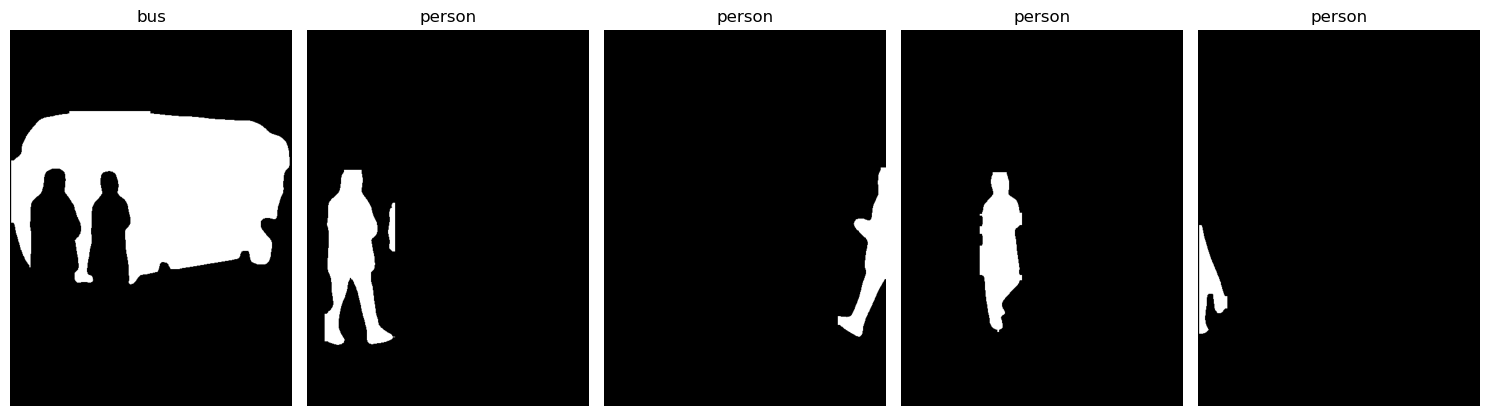

Class: bus, Number of masks: 1


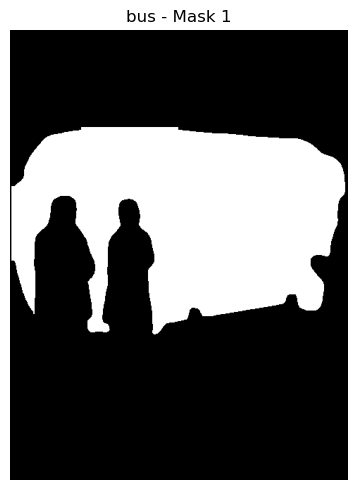

Class: person, Number of masks: 4


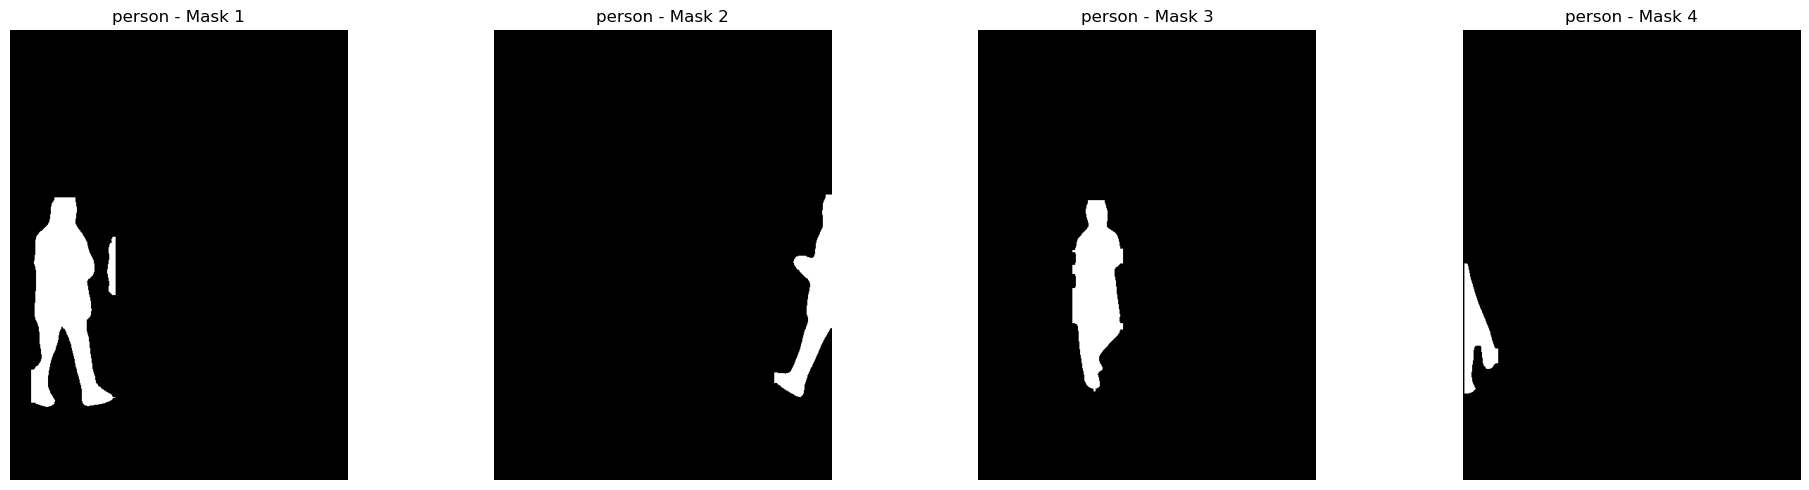

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pretrained segmentation model
model = YOLO('pt/yolov8l-seg.pt')

# Predict on an image
results = model('test/bus.jpg')

# Visualize segmentation with built-in method
results[0].plot()  # plot the first result

# Using matplotlib to visualize all masks and create a class-mask dictionary
class_mask_dict = {}

if results[0].masks is not None:
    num_masks = len(results[0].masks.data)
    fig, axs = plt.subplots(1, num_masks, figsize=(15, 5))
    
    if num_masks == 1:
        axs = [axs]  # If there is only one mask, put it in a list for uniform handling
    
    # Get class IDs and convert to class names
    class_ids = results[0].boxes.cls.cpu().numpy()  # Get class IDs
    class_names = [model.names[int(cls_id)] for cls_id in class_ids]  # Convert class IDs to class names

    # Iterate through masks and plot them, also add them to the dictionary
    for i, mask in enumerate(results[0].masks.data):
        mask_np = mask.cpu().numpy()  # Convert mask to numpy array

        # Add the mask to the dictionary. If the class already exists, append the mask.
        if class_names[i] not in class_mask_dict:
            class_mask_dict[class_names[i]] = [mask_np]  # Create a new list for the class
        else:
            class_mask_dict[class_names[i]].append(mask_np)  # Append the mask to the existing list
        
        axs[i].imshow(mask_np, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f'{class_names[i]}')  # Set the title as the class name

    plt.tight_layout()
    plt.show()
else:
    print("No masks found in the result.")

# Show all masks stored in the dictionary
for class_name, masks in class_mask_dict.items():
    fig, axs = plt.subplots(1, len(masks), figsize=(5 * len(masks), 5))
    
    # Handle case where there is only one mask
    if len(masks) == 1:
        axs = [axs]
    
    print(f"Class: {class_name}, Number of masks: {len(masks)}")
    for j, mask in enumerate(masks):
        axs[j].imshow(mask, cmap='gray')
        axs[j].axis('off')
        axs[j].set_title(f'{class_name} - Mask {j+1}')
    
    plt.tight_layout()
    plt.show()
